In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pickle
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:

# Load dataset
df = pd.read_csv("/kaggle/input/financial-data/labeled_data.csv")

In [3]:
df.head()

,Unnamed: 0,Name,Emirates_ID,Age,Gender,Income,Dependents,Employment_Status,Education_Level,Previous_Assistance,Credit_Score,Region,Financial_Aid_Label,Aid_Score,Aid_Amount
0,0,Qandeel Al Ameri,784-1992-2262209-9,33,أنثى,23431,1,عاطل عن العمل,الثانوية العامة,لا,700,الشارقة,Eligible,40,1500
1,1,Luqman Al Marri,784-1997-5649410-5,28,ذكر,8946,5,متعاقد,دكتوراه,نعم,636,رأس الخيمة,Eligible,50,1500
2,2,Naela Al Suwaidi,784-1991-4379299-7,34,أنثى,26295,4,عاطل عن العمل,بكالوريوس,نعم,583,الفجيرة,Eligible,60,3000
3,3,Rabab Al Mazrouei,784-1993-5746744-2,32,أنثى,28759,1,موظف,بكالوريوس,لا,651,الشارقة,Not Eligible,30,0
4,4,Junaid Al Nuaimi,784-2000-9799330-7,25,ذكر,8903,0,دوام جزئي,الثانوية العامة,لا,589,أم القيوين,Eligible,50,1500


# Data Preprocessing

In [18]:
df.columns

Index(['Unnamed: 0', 'Name', 'Emirates_ID', 'Age', 'Gender', 'Income',
       'Dependents', 'Employment_Status', 'Education_Level',
       'Previous_Assistance', 'Credit_Score', 'Region', 'Financial_Aid_Label',
       'Aid_Score', 'Aid_Amount'],
      dtype='object')

In [4]:
# Select relevant columns
features = ['Credit_Score', 'Education_Level', 'Employment_Status', 'Income',
            'Dependents', 'Age', 'Gender', 'Previous_Assistance']
target = 'Financial_Aid_Label'

In [5]:
# Encode categorical features
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])

le_prev = LabelEncoder()
df['Previous_Assistance'] = le_prev.fit_transform(df['Previous_Assistance'])

le_emp = LabelEncoder()
df['Employment_Status'] = le_emp.fit_transform(df['Employment_Status'])

le_edu = LabelEncoder()
df['Education_Level'] = le_edu.fit_transform(df['Education_Level'])


In [6]:
df.head()

,Unnamed: 0,Name,Emirates_ID,Age,Gender,Income,Dependents,Employment_Status,Education_Level,Previous_Assistance,Credit_Score,Region,Financial_Aid_Label,Aid_Score,Aid_Amount
0,0,Qandeel Al Ameri,784-1992-2262209-9,33,0,23431,1,1,0,0,700,الشارقة,Eligible,40,1500
1,1,Luqman Al Marri,784-1997-5649410-5,28,1,8946,5,3,2,1,636,رأس الخيمة,Eligible,50,1500
2,2,Naela Al Suwaidi,784-1991-4379299-7,34,0,26295,4,1,1,1,583,الفجيرة,Eligible,60,3000
3,3,Rabab Al Mazrouei,784-1993-5746744-2,32,0,28759,1,5,1,0,651,الشارقة,Not Eligible,30,0
4,4,Junaid Al Nuaimi,784-2000-9799330-7,25,1,8903,0,0,0,0,589,أم القيوين,Eligible,50,1500


#  Exploratory Data Analysis (EDA)

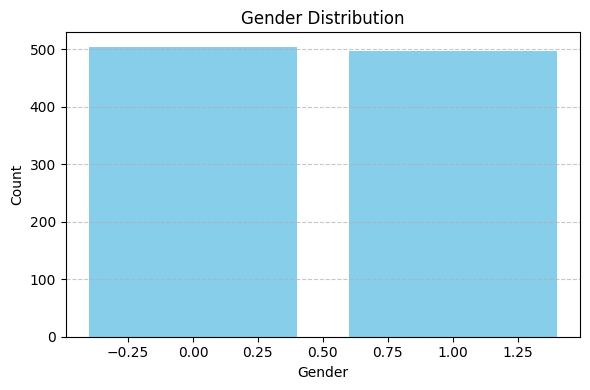

In [48]:
# Count values
gender_counts = df['Gender'].value_counts()

# Plot
plt.figure(figsize=(6, 4))
plt.bar(gender_counts.index, gender_counts.values, color='skyblue')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [22]:
# 2. Region Distribution
fig = px.histogram(df, x='Region', title='Region Distribution')
fig.show()

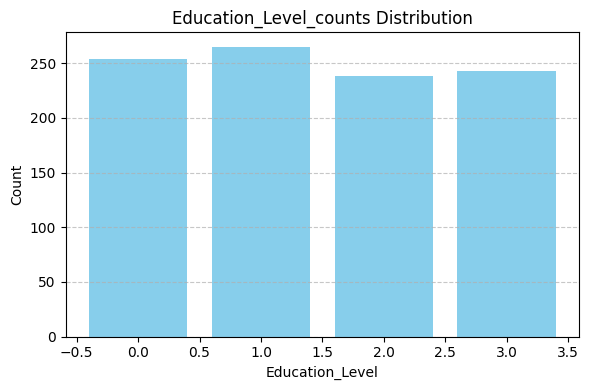

In [50]:
# Count values
Education_Level_counts = df['Education_Level'].value_counts()

# Plot
plt.figure(figsize=(6, 4))
plt.bar(Education_Level_counts.index, Education_Level_counts.values, color='skyblue')
plt.title('Education_Level_counts Distribution')
plt.xlabel('Education_Level')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

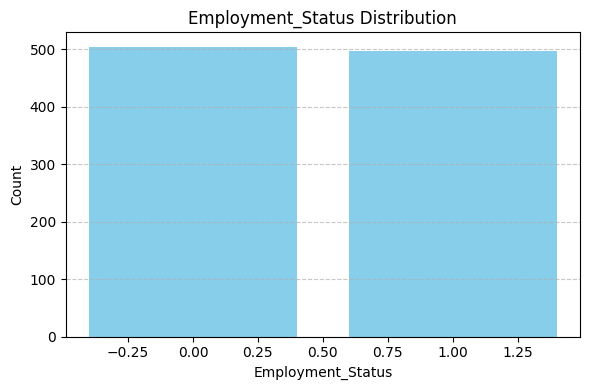

In [51]:


# Count values
Employment_Status_counts = df['Employment_Status'].value_counts()

# Plot
plt.figure(figsize=(6, 4))
plt.bar(gender_counts.index, gender_counts.values, color='skyblue')
plt.title('Employment_Status Distribution')
plt.xlabel('Employment_Status')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [25]:
# 5. Financial Aid Label Count
fig = px.histogram(df, x='Financial_Aid_Label', title='Financial Aid Labels')
fig.show()

In [26]:
# 6. Boxplot: Age by Gender
fig = px.box(df, x='Gender', y='Age', title='Age Distribution by Gender')
fig.show()

In [27]:
# 7. Boxplot: Income by Employment Status
fig = px.box(df, x='Employment_Status', y='Income', title='Income by Employment Status')
fig.show()

In [28]:
# 8. Boxplot: Credit Score by Education Level
fig = px.box(df, x='Education_Level', y='Credit_Score', title='Credit Score by Education')fig.show()

In [58]:
import plotly.graph_objects as go

# Create bins for grouping
df['Income_bin'] = pd.cut(df['Income'], bins=10)
df['Credit_bin'] = pd.cut(df['Credit_Score'], bins=10)

# Pivot table for surface plot
pivot_table = df.pivot_table(values='Aid_Amount', 
                             index='Income_bin', 
                             columns='Credit_bin', 
                             aggfunc='mean')

# Prepare data
z = pivot_table.values
x = [str(c) for c in pivot_table.columns]
y = [str(i) for i in pivot_table.index]

# Surface plot
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='3D Surface: Aid Amount by Income and Credit Score',
                  scene=dict(xaxis_title='Credit Score Bin',
                             yaxis_title='Income Bin',
                             zaxis_title='Aid Amount'))
fig.show()


/tmp/ipykernel_31/3073311771.py:8: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



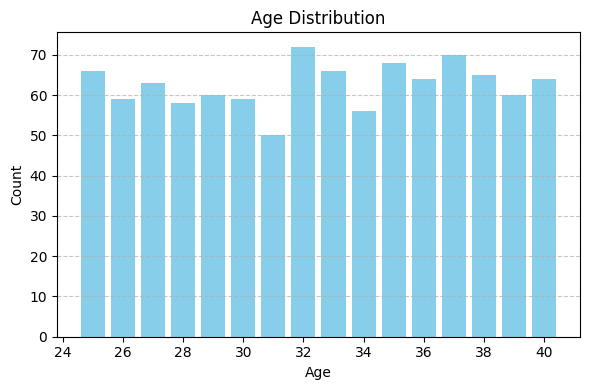

In [53]:
# Count values
Age_counts = df['Age'].value_counts()

# Plot
plt.figure(figsize=(6, 4))
plt.bar(Age_counts.index, Age_counts.values, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

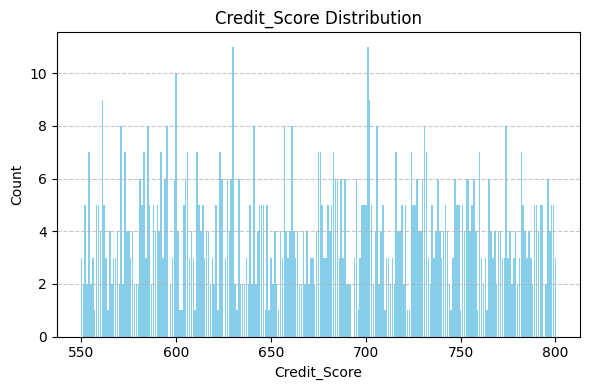

In [54]:
# Count values
Credit_Score_counts = df['Credit_Score'].value_counts()

# Plot
plt.figure(figsize=(6, 4))
plt.bar(Credit_Score_counts.index, Credit_Score_counts.values, color='skyblue')
plt.title('Credit_Score Distribution')
plt.xlabel('Credit_Score')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [57]:
# 11. Histogram: Aid Amount
fig = px.histogram(df, x='Aid_Amount', nbins=20, title='Aid Amount Distribution')
fig.show()



In [32]:
# 12. Scatter Plot: Income vs Credit Score
fig = px.scatter(df, x='Income', y='Credit_Score', color='Financial_Aid_Label', title='Income vs Credit Score')
fig.show()

In [33]:
# 13. Scatter Plot: Age vs Aid Score
fig = px.scatter(df, x='Age', y='Aid_Score', color='Gender', title='Age vs Aid Score')
fig.show()

In [34]:
# 14. Pie Chart: Gender
fig = px.pie(df, names='Gender', title='Gender Distribution Pie')
fig.show()

In [35]:
# 15. Pie Chart: Previous Assistance
fig = px.pie(df, names='Previous_Assistance', title='Previous Assistance Received')
fig.show()

In [36]:
# 16. Bar Chart: Average Income per Region
fig = px.bar(df.groupby('Region')['Income'].mean().reset_index(), x='Region', y='Income', title='Avg Income per Region')
fig.show()

In [37]:
# 17. Violin Plot: Age by Financial Aid Label
fig = px.violin(df, y='Age', x='Financial_Aid_Label', color='Gender', box=True, points='all', title='Age by Aid Label')
fig.show()

In [38]:
# 18. 3D Scatter: Income vs Credit Score vs Aid Amount
fig = px.scatter_3d(df, x='Income', y='Credit_Score', z='Aid_Amount', color='Financial_Aid_Label',
                    hover_data=['Name', 'Region'], title='3D: Income vs Credit Score vs Aid Amount')
fig.show()

In [39]:
fig = px.scatter_3d(df, 
                    x='Age', 
                    y='Credit_Score', 
                    z='Aid_Score', 
                    color='Financial_Aid_Label',
                    symbol='Gender',
                    title='3D: Age vs Credit Score vs Aid Score')
fig.show()


In [40]:
fig = px.scatter_3d(df,
                    x='Income',
                    y='Dependents',
                    z='Aid_Amount',
                    color='Employment_Status',
                    title='3D: Income vs Dependents vs Aid Amount')
fig.show()


In [41]:
fig = px.scatter_3d(df, 
                    x='Income', 
                    y='Credit_Score', 
                    z='Age', 
                    size='Aid_Score', 
                    color='Education_Level',
                    title='3D Bubble: Income vs Credit Score vs Age')
fig.show()


In [47]:
df_sorted = df.sort_values(by='Income')

fig = go.Figure(data=go.Scatter3d(
    x=df_sorted['Income'],
    y=df_sorted['Credit_Score'],
    z=df_sorted['Aid_Amount'],
    mode='lines+markers',
    marker=dict(size=5, color=df_sorted['Aid_Score'], colorscale='Viridis'),
    line=dict(color='darkblue', width=2)
))
fig.update_layout(title='3D Line: Income vs Credit Score vs Aid Amount')
fig.show()


In [46]:
fig = px.scatter_matrix(df,
                        dimensions=['Age', 'Income', 'Credit_Score', 'Aid_Score', 'Aid_Amount'],
                        color='Financial_Aid_Label',
                        title='3D Scatter Matrix: Multivariate Exploration')
fig.show()


# Model traing

In [112]:
# Encode target variable
df[target] = df[target].map({'Eligible': 1, 'Not Eligible': 0})

# Create feature matrix and target array
X = df[features].values
y = df[target].values

In [113]:

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [116]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [13]:
# Build simple ANN model
model = Sequential([
    Dense(16, input_dim=X.shape[1], activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile and train model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1744992434.933092      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1744992434.933803      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 833 (3.25 KB)

 Trainable params: 833 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

In [121]:
# Compile and train model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.9964 - loss: 0.0178 - val_accuracy: 0.8800 - val_loss: 0.7173
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 0.8700 - val_loss: 0.7125
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.8800 - val_loss: 0.7018
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.6076e-04 - val_accuracy: 0.8800 - val_loss: 0.7269
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.8800 - val_loss: 0.7484
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.8850 - val_loss: 0.7395
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.8046e-04 - val_accuracy: 0.8850 - val_loss: 0.7504
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.8800 -

In [148]:


# Save model
model.save("financial_aid_model.h5")

# Save encoders and scaler
with open("preprocessing_pipeline.pkl", "wb") as f:
    pickle.dump({
        "scaler": scaler,
        "le_gender": le_gender,
        "le_prev": le_prev,
        "le_emp": le_emp,
        "le_edu": le_edu
    }, f)


In [123]:
from tensorflow.keras.models import load_model

# Load model and preprocessing tools
model = load_model("/kaggle/working/financial_aid_model.h5")
with open("/kaggle/working/preprocessing_pipeline.pkl", "rb") as f:
    tools = pickle.load(f)

scaler = tools["scaler"]
le_gender = tools["le_gender"]
le_prev = tools["le_prev"]
le_emp = tools["le_emp"]
le_edu = tools["le_edu"]

def predict_eligibility(input_data):
    """
    input_data: dict with keys -
        'Credit_Score', 'Education_Level', 'Employment_Status', 'Income',
        'Dependents', 'Age', 'Gender', 'Previous_Assistance'
    Returns: True (Eligible) or False (Not Eligible)
    """

    """
   ['Credit_Score', 'Education_Level', 'Employment_Status', 'Income',
            'Dependents', 'Age', 'Gender', 'Previous_Assistance']
 
    """
    # print(input_data['Credit_Score'])
    # try:
    # Prepare input
    x = np.array([[
        input_data['Credit_Score'],
        le_edu.transform([input_data['Education_Level']])[0],
        le_emp.transform([input_data['Employment_Status']])[0],
        input_data['Income'],
        input_data['Dependents'],
        input_data['Age'],
        le_gender.transform([input_data['Gender']])[0],
        le_prev.transform([input_data['Previous_Assistance']])[0]
    ]])
    # Normalize
    x_scaled = scaler.transform(x)

    # Predict
    prediction = model.predict(x_scaled)[0][0]
    if prediction >= 0.5:
        print('Eligible')
    else:
        print('Not Eligible')
    return prediction >= 0.5  # True or False
    # except Exception as e:
        # print("Error during prediction:", e)
        # return False


In [147]:
num=np.random.randint(1,500,1)[0]
df.iloc[num], predict_eligibility(dict(df.iloc[num]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Eligible


(Unnamed: 0                             44
 Name                     Mawadda Al Kaabi
 Emirates_ID            784-1993-6257083-6
 Age                                    32
 Gender                               أنثى
 Income                              29567
 Dependents                              4
 Employment_Status                  متقاعد
 Education_Level                   دكتوراه
 Previous_Assistance                    لا
 Credit_Score                          678
 Region                            الشارقة
 Financial_Aid_Label              Eligible
 Aid_Score                              45
 Aid_Amount                           1500
 Name: 44, dtype: object,
 True)